In [2]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com

All the necessary libraries used for this particular analysis are loaded above 

## Loading of data

In this particular part we are loading all the possible data that was given to us as a prerequisite along with the data that we collected in the first phase of the capstone project. 

In [3]:
df_crimes = pd.read_csv(r'C:\Users\sanku\OneDrive\Desktop\India_Crime - Copy\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv')
df_literacy = pd.read_csv(r'C:\Users\sanku\OneDrive\Desktop\Capstone\Phase 1\state_wise_literacy_rate.csv')
df_population = pd.read_csv(r'C:\Users\sanku\OneDrive\Desktop\Capstone\Phase 1\state_wise_population.csv')
df_area = pd.read_csv(r'C:\Users\sanku\OneDrive\Desktop\Capstone\Phase 1\state_wise_area.csv')

In [4]:
df_crimes.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [5]:
df_population.head()

,STATE/UT,State_drop,Population
0,A & N ISLANDS,A & N ISLANDS,"380,581"
1,ANDHRA PRADESH,Andhra Pradesh,"84,580,777"
2,ARUNACHAL PRADESH,Arunachal Pradesh,"1,383,727"
3,ASSAM,Assam,"31,169,272"
4,BIHAR,Bihar,"104,099,452"


In [6]:
df_literacy.head()

,STATE/UT,State_drop,2011 Literacy Rate (%)
0,A & N ISLANDS,A & N ISLANDS,86.27
1,ANDHRA PRADESH,ANDHRA PRADESH,67.66
2,ARUNACHAL PRADESH,ARUNACHAL PRADESH,66.95
3,ASSAM,ASSAM,72.19
4,CHANDIGARH,CHANDIGARH,63.82


In [7]:
df_area.head()

,STATE/UT,State_drop,Area (in square kilometers)
0,A & N ISLANDS,A & N ISLANDS,"8,249"
1,ANDHRA PRADESH,Andhra Pradesh,"160,205"
2,ARUNACHAL PRADESH,Arunachal Pradesh,"83,743"
3,ASSAM,Assam,"78,438"
4,BIHAR,Bihar,"94,163"


### In the above part what we have done is we have loaded the necessary data such as the area of each state, the literacy rate of each state and also the population of each state.

In [8]:
df_crimes.shape

(9017, 33)

In [9]:
temp = df_crimes.drop(df_crimes.iloc[:, 1:32], axis=1)

In [10]:
temp.head()

,STATE/UT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,4154
1,ANDHRA PRADESH,4125
2,ANDHRA PRADESH,5818
3,ANDHRA PRADESH,3140
4,ANDHRA PRADESH,6507


### The data given us to as a prerequisite data was segregated in the form of districts of each state so what we have done is removed all the columns in middle of that gave us the measure names and just shown the crimes in each district of that particular state

In [11]:
total_crimes = temp.groupby('STATE/UT').agg('sum')

In [12]:
total_crimes.head()

,TOTAL IPC CRIMES
STATE/UT,
A & N ISLANDS,18204
ANDHRA PRADESH,4037962
ARUNACHAL PRADESH,55304
ASSAM,1195528
BIHAR,2692586


### Now the total crimes are added together of all districts of each state and this is done for all the states of the country. this will give us the total crimes of each state for that particular year and this will be extremely helpful to us in the further analysis 

In [13]:
df_literacy = df_literacy.drop('State_drop', axis=1)
df_population = df_population.drop('State_drop', axis=1)
df_area = df_area.drop('State_drop', axis=1)

In [14]:
df_literacy.head()

,STATE/UT,2011 Literacy Rate (%)
0,A & N ISLANDS,86.27
1,ANDHRA PRADESH,67.66
2,ARUNACHAL PRADESH,66.95
3,ASSAM,72.19
4,CHANDIGARH,63.82


### Similarly, The literacy rate for each state is shown in the above table

In [15]:
df_population.head()

,STATE/UT,Population
0,A & N ISLANDS,"380,581"
1,ANDHRA PRADESH,"84,580,777"
2,ARUNACHAL PRADESH,"1,383,727"
3,ASSAM,"31,169,272"
4,BIHAR,"104,099,452"


### Population in all the particular state is shown above 

In [16]:
df_area.head()

,STATE/UT,Area (in square kilometers)
0,A & N ISLANDS,"8,249"
1,ANDHRA PRADESH,"160,205"
2,ARUNACHAL PRADESH,"83,743"
3,ASSAM,"78,438"
4,BIHAR,"94,163"


### Area of all the states are shown above

# 1. Analysis of Population vs overall Crime

In [23]:
population_analysis_df = pd.merge(total_crimes, df_population, on='STATE/UT', how='inner')

In [24]:
population_analysis_df.head()

,STATE/UT,TOTAL IPC CRIMES,Population
0,A & N ISLANDS,18204,"380,581"
1,ANDHRA PRADESH,4037962,"84,580,777"
2,ARUNACHAL PRADESH,55304,"1,383,727"
3,ASSAM,1195528,"31,169,272"
4,BIHAR,2692586,"104,099,452"


### Above, we have combined the total population and the total crimes of every state and union territory of the country. We peculiarly have to combine these using the state names so attention to details has to be observed while merging the two datasets that are need to be analysed. After combining we will undergo visual analysis to see what the data tells us

<AxesSubplot:xlabel='TOTAL IPC CRIMES', ylabel='Population'>

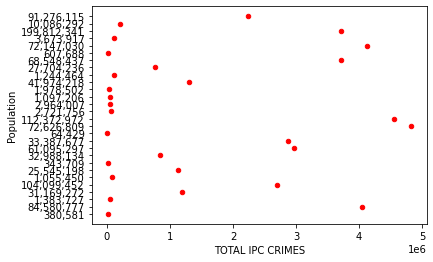

In [25]:
population_analysis_df.plot(kind='scatter', x='TOTAL IPC CRIMES', y='Population', color='red')

<AxesSubplot:>

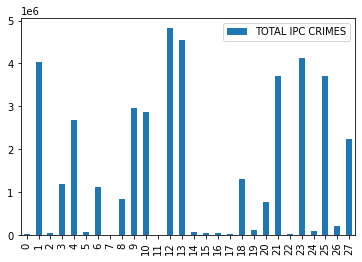

In [47]:
population_analysis_df.plot.bar()

### We have above used scatter plot and bar plot to describe the merged data set. it tells us that bar a certain exceptions the states that have more number of population usually tend to have a high amount of crimes. 

# 2. Analysis of Literacy Rate vs Total Crimes.

In [20]:
literacy_analysis_df = pd.merge(total_crimes, df_literacy, on='STATE/UT', how='inner')

In [21]:
literacy_analysis_df.head()

,STATE/UT,TOTAL IPC CRIMES,2011 Literacy Rate (%)
0,A & N ISLANDS,18204,86.27
1,ANDHRA PRADESH,4037962,67.66
2,ARUNACHAL PRADESH,55304,66.95
3,ASSAM,1195528,72.19
4,CHANDIGARH,81614,63.82


### We have above merged the total crimes data set along with literacy rate of each state and we will now compare how the literacy rate in each state affects the total crimes in that state.

<AxesSubplot:xlabel='TOTAL IPC CRIMES', ylabel='2011 Literacy Rate (%)'>

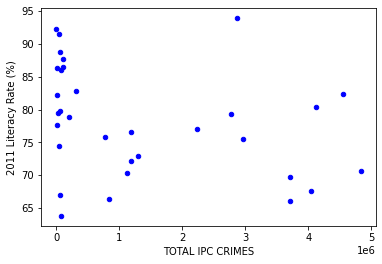

In [26]:
literacy_analysis_df.plot(kind='scatter', x='TOTAL IPC CRIMES', y='2011 Literacy Rate (%)', color='blue')

<AxesSubplot:>

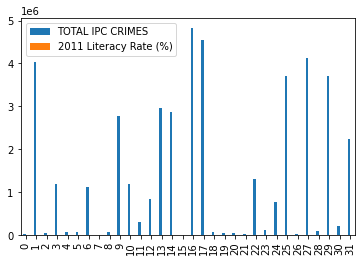

In [48]:
literacy_analysis_df.plot.bar()

### The above visual analysis tells us that barring a few exceptions the state with the highest literacy rate has a lesser amount of crime. 

# 3. Analysis of area vs overall crime

In [27]:
area_analysis_df = pd.merge(total_crimes, df_area, on='STATE/UT', how='inner')

In [28]:
area_analysis_df.head()

,STATE/UT,TOTAL IPC CRIMES,Area (in square kilometers)
0,A & N ISLANDS,18204,"8,249"
1,ANDHRA PRADESH,4037962,"160,205"
2,ARUNACHAL PRADESH,55304,"83,743"
3,ASSAM,1195528,"78,438"
4,BIHAR,2692586,"94,163"


### We have now merged total crimes with overall crime dataset

<AxesSubplot:xlabel='TOTAL IPC CRIMES', ylabel='Area (in square kilometers)'>

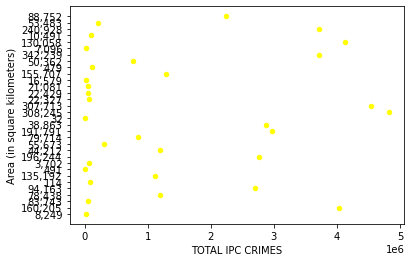

In [29]:
area_analysis_df.plot(kind='scatter', x='TOTAL IPC CRIMES', y='Area (in square kilometers)', color='yellow')

<AxesSubplot:>

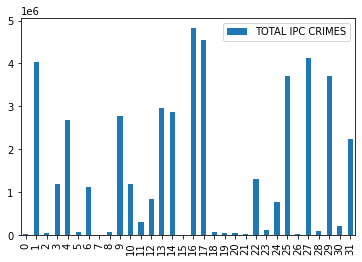

In [49]:
area_analysis_df.plot.bar()

### Usually the state with more amount of areas tend to have more amount of crime but that is not an absolute and thus tend to have a few exceptions 

# 4. Analysis of year-on-year total crime rate.

In [30]:
temp_1 = df_crimes.drop(df_crimes.iloc[:, 3:32], axis=1)

In [31]:
year_df = temp_1.drop(temp_1.iloc[:, 0:2], axis=1)

In [32]:
year_df.head()

,YEAR,TOTAL IPC CRIMES
0,2001,4154
1,2001,4125
2,2001,5818
3,2001,3140
4,2001,6507


### Above we have to analyse the crime rate. meaning that we have to differentiate crimes done yearly. Therefore we will remove all the columns that are not required and keep only two columns year and total crimes 

In [33]:
total_year_crimes = year_df.groupby('YEAR').agg('sum')

In [34]:
total_year_crimes.head()

,TOTAL IPC CRIMES
YEAR,
2001,3538616
2002,3560660
2003,3432240
2004,3664020
2005,3645204


### We have grouped the data in terms of Year and added up total crimes from each district of each state and have combined them giving us the total crime commited in each year 

In [42]:
new_df = total_year_crimes.reset_index()

<AxesSubplot:xlabel='TOTAL IPC CRIMES', ylabel='YEAR'>

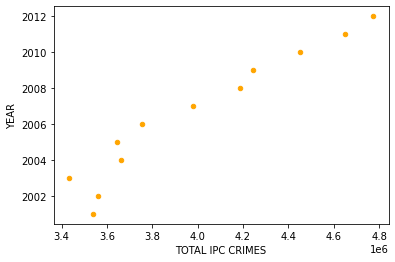

In [44]:
new_df.plot(kind='scatter', x='TOTAL IPC CRIMES', y='YEAR', color='orange')

<AxesSubplot:>

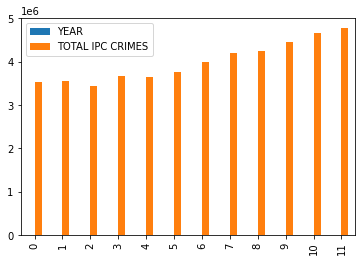

In [50]:
new_df.plot.bar()

### The above Visual analysys gives us the description of the yearly crime rate. it tells us that the crimes have increased yearly from 2002 to 2012

# Conclusion 

<br><font face = "Muller Text" size = "4"> <b> We can conclude from all the operations that we have done above that included removing columns. merging the required datasets for a particular analysis and then visual analysis is that Total crimes commited each year by criminals are a combination of multiple factors. we first considered the population criteria vs total crimes and came to the conclusion that population is directly related to the total crimes commited in that particular state. This makes sense because let's consider UP. UP has a lot of population meaning by just sheer probability it will have more number of criminals and more number of innocent people towards who the crimes would be commited. 

<br><font face = "Muller Text" size = "4"> <b> Secondly, we considered Literacy rate with the total crimes commited as the more educated a population dynamic of a state is the more sensible they would be. the more they would understand that commiting criminal activities is not humane. 
    
<br><font face = "Muller Text" size = "4"> <b> Lastly we considered the factor of area vs total crimes, This is an important aspect too because bigger the state the more people it would have and more the people the more crimes we will be see commited towards the people of that state.
    
### All in all we can conclude that when all the three factors, Population, area and Literacy rate are important and are directly related to the total crimes commited in each state or union territory. 